# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### Descrizione del modello

Il modello che ho creato fitta la funzione utilizzando:

- Training Dataset di 100000 coppie (x,y);
- Validation Dataset di 10000 coppie (x,y);
- Rumore Gaussiano posto = 0;
- 4 layer da (60,150,60,1) neuroni, con funzione di attivazione relu (18451 parametri);
- optimizer sgd, loss e metrics mse;
- training di 30 epoche con batch size = 100;

Di seguito ho esposto:

- rappresentazione del training set e della funzione target;
- summary del modello;
- prestazioni del modello e risultati

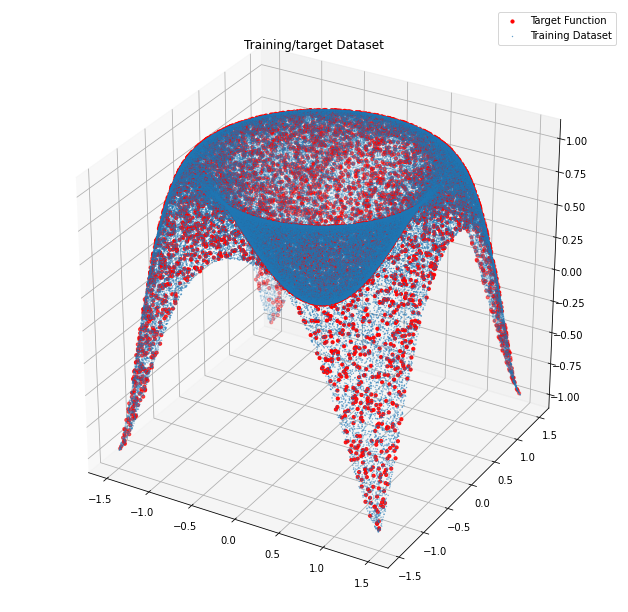

In [146]:
# Target function: f(x,y) = sin(x^2 + y^2)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(7)
Ntrain = 100000
Nvalid = 10000
sigma = 0                                 # noise standard deviation, for the moment it is absent

x_train = np.zeros((Ntrain,2))            #Generating training Dataset
z_train = np.zeros(Ntrain)
for i in range(Ntrain):
  x_train[i,0] = np.random.uniform(-1.5,1.5)
  x_train[i,1] = np.random.uniform(-1.5,1.5)
  z_train[i] = np.random.normal(np.sin(x_train[i,0]**2 + x_train[i,1]**2), sigma)

x_valid = np.zeros((Nvalid,2))            #Generating validation Dataset
z_valid = np.zeros(Nvalid)
for i in range(Nvalid):
  x_valid[i,0] = np.random.uniform(-1.5,1.5)
  x_valid[i,1] = np.random.uniform(-1.5,1.5)
  z_valid[i] = np.random.normal(np.sin(x_valid[i,0]**2 + x_valid[i,1]**2), sigma)

x_repr_train = np.zeros(Ntrain)         # Questi servono solo per la rappresentazione grafica dei Dataset
y_repr_train = np.zeros(Ntrain)
x_repr_valid = np.zeros(Nvalid)
y_repr_valid = np.zeros(Nvalid)
z_target = np.zeros(Nvalid)
for i in range(Ntrain):
  x_repr_train[i] = x_train[i,0]
  y_repr_train[i] = x_train[i,1]
for i in range(Nvalid):
  x_repr_valid[i] = x_valid[i,0]
  y_repr_valid[i] = x_valid[i,1]
  z_target[i] = np.sin(x_repr_valid[i]**2 + y_repr_valid[i]**2)

fig = plt.figure(figsize=[11,11])
ax = fig.gca(projection='3d')
ax.scatter(x_repr_valid, y_repr_valid, z_target, s=10, label = 'Target Function', color='r')
ax.scatter(x_repr_train, y_repr_train, z_train, s=0.1, label = 'Training Dataset')
plt.legend()
plt.title('Training/target Dataset')
plt.show()

In [148]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(60,input_shape=(2,), activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 60)                180       
_________________________________________________________________
dense_99 (Dense)             (None, 150)               9150      
_________________________________________________________________
dense_100 (Dense)            (None, 60)                9060      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 61        
Total params: 18,451
Trainable params: 18,451
Non-trainable params: 0
_________________________________________________________________


In [149]:
# fit the model using training dataset
history = model.fit(x=x_train, y=z_train, 
          batch_size=100, epochs=30,
          shuffle=True, validation_data=(x_valid, z_valid))

Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1362 - mse: 0.1362 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0970 - mse: 0.0970 - val_loss: 0.0770 - val_mse: 0.0770
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/30
1000/1000 [==============================] - 2s 2ms

### Prestazioni e risultati del modello

Di seguito sono presentate:

- accuratezza del modello sul set di training e di validation
- andamento della loss function sul set di training e di validation
- confronto tra le predizioni del modello e la funzione target

400/400 [==============================] - 1s 1ms/step - loss: 8.6289e-05 - mse: 8.6289e-05

Test loss: 8.628939394839108e-05
Test accuracy: 8.628939394839108e-05
400/400 [==============================] - 0s 1ms/step - loss: 8.6289e-05 - mse: 8.6289e-05

Test loss: 8.628939394839108e-05
Test accuracy: 8.628939394839108e-05


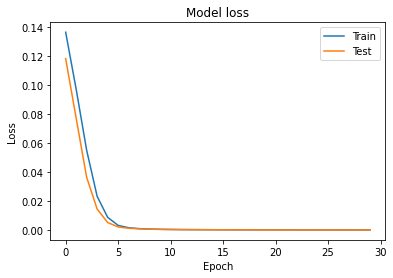

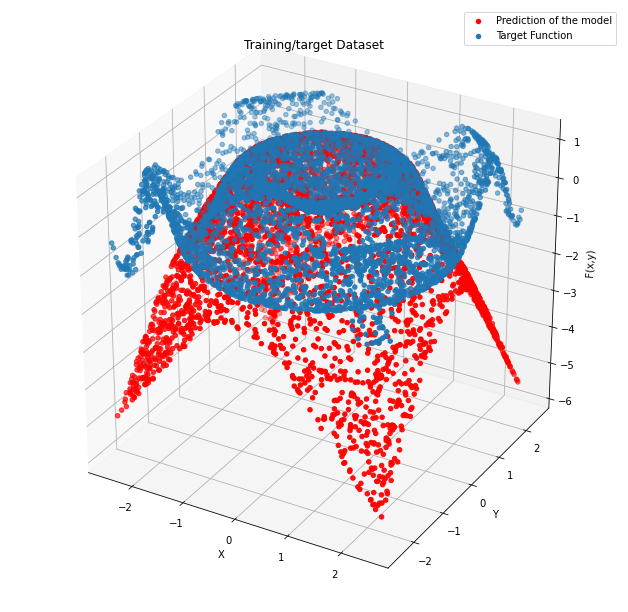

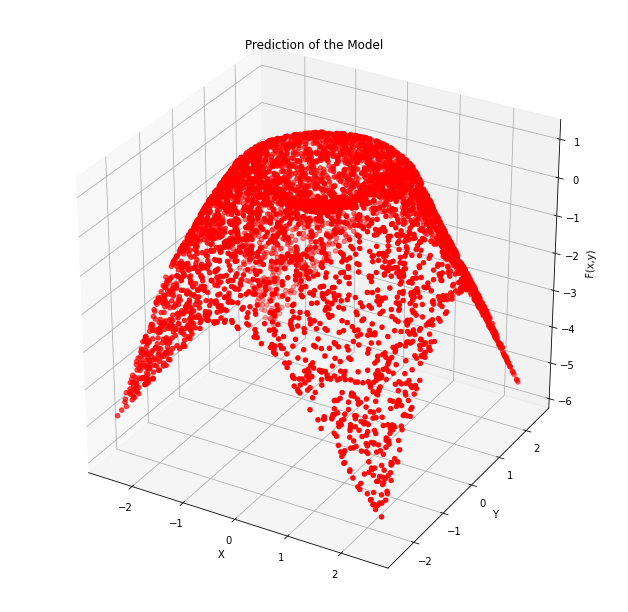

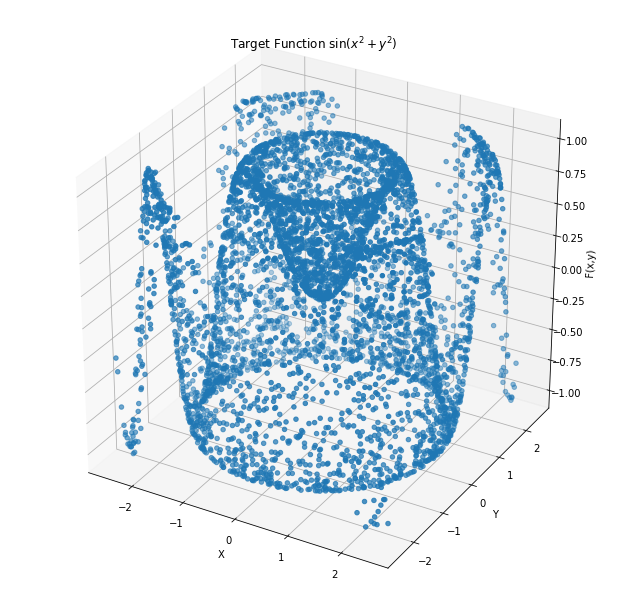

In [152]:
# evaluate model
score = model.evaluate(x_valid, z_valid, batch_size=25, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score2 = model.evaluate(x_valid, z_target, batch_size=25, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Nprediction = 5000
x_predicted = np.zeros((Nprediction,2))
x_pred_rep = np.zeros(Nprediction)
y_pred_rep = np.zeros(Nprediction)
for i in range(Nprediction):
  x_predicted[i,0] = np.random.uniform(-2.5, 2.5)
  x_predicted[i,1] = np.random.uniform(-2.5, 2.5)
  x_pred_rep[i] = x_predicted[i,0]
  y_pred_rep[i] = x_predicted[i,1]

z_predicted = model.predict(x_predicted)

x_repr_valid0 = np.random.uniform(-2.5,2.5,5000)
y_repr_valid0 = np.random.uniform(-2.5,2.5,5000)
z_target0 = np.sin(x_repr_valid0**2 + y_repr_valid0**2)

fig = plt.figure(figsize=[11,11])
ax = fig.gca(projection='3d')
ax.scatter(x_pred_rep, y_pred_rep, z_predicted, label = 'Prediction of the model', color = 'r')
ax.scatter(x_repr_valid0, y_repr_valid0, z_target0, label = 'Target Function')
plt.legend()
plt.title('Training/target Dataset')
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('F(x,y)')
plt.show()

fig2 = plt.figure(figsize=[11,11])
ax2 = fig2.gca(projection='3d')
ax2.scatter(x_pred_rep, y_pred_rep, z_predicted, color = 'r')
plt.title('Prediction of the Model')
plt.xlabel('X')
plt.ylabel('Y')
ax2.set_zlabel('F(x,y)')
plt.show()
fig3 = plt.figure(figsize=[11,11])
ax3 = fig3.gca(projection='3d')
ax3.scatter(x_repr_valid0, y_repr_valid0, z_target0, label = 'Target Function')
plt.title('Target Function sin($x^2 + y^2$)')
plt.xlabel('X')
plt.ylabel('Y')
ax3.set_zlabel('F(x,y)')
plt.show()


### Confronto sulle sezioni

Ho riportato anche un confronto tra predizioni del modello e funzione target su alcuni piani (sia a x che ad y costante):

- x/y = -1.5
- x/y = 1.5
- x/y = 0
- x/y = $\sqrt(\frac{\pi}{2})$

Per confrontare modello e target agli estremi dell'intervallo, nel centro dell'intervallo e dove la funzione target diventa minore di 0.

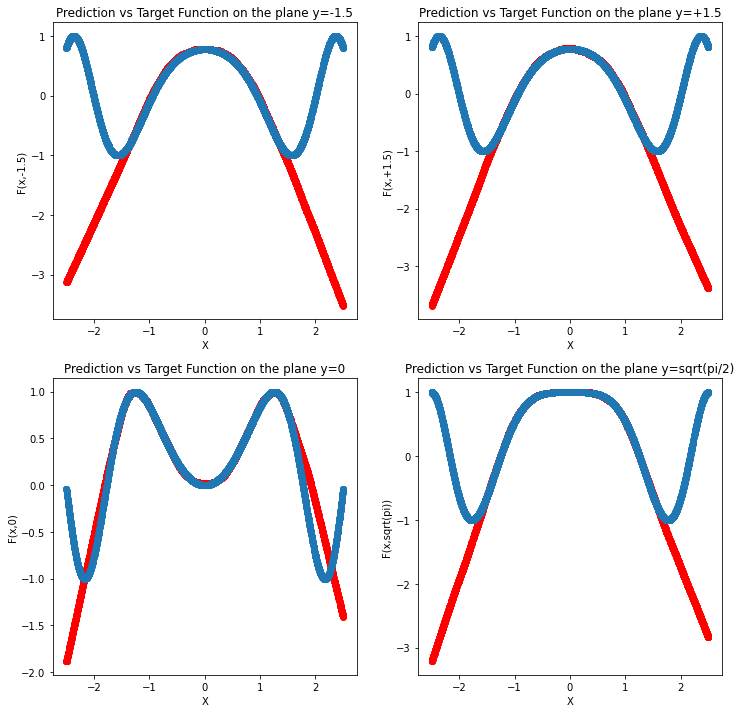

In [153]:
# sezioni a y = -1.5, 1.5, 0, sqrt(pi/2)

x_predicted = np.zeros((Nprediction,2))
x_pred_rep = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = -1.5
  x_predicted[i,0] = np.random.uniform(-2.5, 2.5)
  x_predicted[i,1] = -1.5
  x_pred_rep[i] = x_predicted[i,0]
z_predicted = model.predict(x_predicted)
x_tg = np.random.uniform(-2.5,2.5,Nprediction)
z_tg = np.sin(x_tg**2 + 1.5**2)

x_predicted2 = np.zeros((Nprediction,2))
x_pred_rep2 = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = +1.5
  x_predicted2[i,0] = np.random.uniform(-2.5, 2.5)
  x_predicted2[i,1] = 1.5
  x_pred_rep2[i] = x_predicted2[i,0]
z_predicted2 = model.predict(x_predicted2)
x_tg2 = np.random.uniform(-2.5,2.5,Nprediction)
z_tg2 = np.sin(x_tg2**2 + 1.5**2)

x_predicted3 = np.zeros((Nprediction,2))
x_pred_rep3 = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = 0
  x_predicted3[i,0] = np.random.uniform(-2.5, 2.5)
  x_predicted3[i,1] = 0
  x_pred_rep3[i] = x_predicted3[i,0]
z_predicted3 = model.predict(x_predicted3)
x_tg3 = np.random.uniform(-2.5,2.5,Nprediction)
z_tg3 = np.sin(x_tg3**2)

a = np.pi/2
x_predicted4 = np.zeros((Nprediction,2))
x_pred_rep4 = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = sqrt(pi/2)
  x_predicted4[i,0] = np.random.uniform(-2.5, 2.5)
  x_predicted4[i,1] = np.sqrt(a)
  x_pred_rep4[i] = x_predicted4[i,0]
z_predicted4 = model.predict(x_predicted4)
x_tg4 = np.random.uniform(-2.5,2.5,Nprediction)
z_tg4 = np.sin(x_tg4**2 + a)

plt.figure(figsize=[12,12])
plt.subplot(2,2,1)
plt.scatter(x_pred_rep, z_predicted, label='Prediction of the model', color='r')
plt.scatter(x_tg, z_tg, label='Target Function')
plt.title('Prediction vs Target Function on the plane y=-1.5')
plt.xlabel('X')
plt.ylabel('F(x,-1.5)')
plt.subplot(2,2,2)
plt.scatter(x_pred_rep2, z_predicted2, label='Prediction of the model', color='r')
plt.scatter(x_tg2, z_tg2, label='Target Function')
plt.title('Prediction vs Target Function on the plane y=+1.5')
plt.xlabel('X')
plt.ylabel('F(x,+1.5)')
plt.subplot(2,2,3)
plt.scatter(x_pred_rep3, z_predicted3, label='Prediction of the model', color='r')
plt.scatter(x_tg3, z_tg3, label='Target Function')
plt.title('Prediction vs Target Function on the plane y=0')
plt.xlabel('X')
plt.ylabel('F(x,0)')
plt.subplot(2,2,4)
plt.scatter(x_pred_rep4, z_predicted4, label='Prediction of the model', color='r')
plt.scatter(x_tg4, z_tg4, label='Target Function')
plt.title('Prediction vs Target Function on the plane y=sqrt(pi/2)')
plt.xlabel('X')
plt.ylabel("F(x,sqrt(pi))")
plt.show()

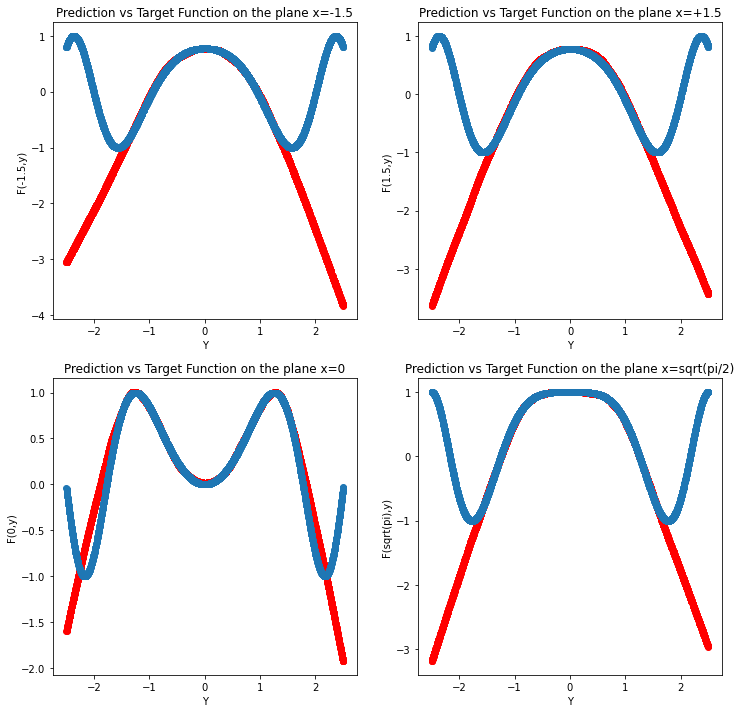

In [154]:
# sezioni a x = -1.5, 1.5, 0, sqrt(pi/2)

x_predicted = np.zeros((Nprediction,2))
y_pred_rep = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = -1.5
  x_predicted[i,1] = np.random.uniform(-2.5, 2.5)
  x_predicted[i,0] = -1.5
  y_pred_rep[i] = x_predicted[i,1]
z_predicted = model.predict(x_predicted)
y_tg = np.random.uniform(-2.5,2.5,Nprediction)
z_tg = np.sin(y_tg**2 + 1.5**2)

x_predicted2 = np.zeros((Nprediction,2))
y_pred_rep2 = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = +1.5
  x_predicted2[i,1] = np.random.uniform(-2.5, 2.5)
  x_predicted2[i,0] = 1.5
  y_pred_rep2[i] = x_predicted2[i,1]
z_predicted2 = model.predict(x_predicted2)
y_tg2 = np.random.uniform(-2.5,2.5,Nprediction)
z_tg2 = np.sin(y_tg2**2 + 1.5**2)

x_predicted3 = np.zeros((Nprediction,2))
y_pred_rep3 = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = 0
  x_predicted3[i,1] = np.random.uniform(-2.5, 2.5)
  x_predicted3[i,0] = 0
  y_pred_rep3[i] = x_predicted3[i,1]
z_predicted3 = model.predict(x_predicted3)
y_tg3 = np.random.uniform(-2.5,2.5,Nprediction)
z_tg3 = np.sin(y_tg3**2)

a = np.pi/2
x_predicted4 = np.zeros((Nprediction,2))
y_pred_rep4 = np.zeros(Nprediction)
for i in range(Nprediction):                      #calcolo le predizioni del modello sul piano y = sqrt(pi/2)
  x_predicted4[i,1] = np.random.uniform(-2.5, 2.5)
  x_predicted4[i,0] = np.sqrt(a)
  y_pred_rep4[i] = x_predicted4[i,1]
z_predicted4 = model.predict(x_predicted4)
y_tg4 = np.random.uniform(-2.5,2.5,Nprediction)
z_tg4 = np.sin(y_tg4**2 + a)

plt.figure(figsize=[12,12])
plt.subplot(2,2,1)
plt.scatter(y_pred_rep, z_predicted, label='Prediction of the model', color='r')
plt.scatter(y_tg, z_tg, label='Target Function')
plt.title('Prediction vs Target Function on the plane x=-1.5')
plt.xlabel('Y')
plt.ylabel('F(-1.5,y)')
plt.subplot(2,2,2)
plt.scatter(y_pred_rep2, z_predicted2, label='Prediction of the model', color='r')
plt.scatter(y_tg2, z_tg2, label='Target Function')
plt.title('Prediction vs Target Function on the plane x=+1.5')
plt.xlabel('Y')
plt.ylabel('F(1.5,y)')
plt.subplot(2,2,3)
plt.scatter(y_pred_rep3, z_predicted3, label='Prediction of the model', color='r')
plt.scatter(y_tg3, z_tg3, label='Target Function')
plt.title('Prediction vs Target Function on the plane x=0')
plt.xlabel('Y')
plt.ylabel('F(0,y)')
plt.subplot(2,2,4)
plt.scatter(y_pred_rep4, z_predicted4, label='Prediction of the model', color='r')
plt.scatter(y_tg4, z_tg4, label='Target Function')
plt.title('Prediction vs Target Function on the plane x=sqrt(pi/2)')
plt.xlabel('Y')
plt.ylabel("F(sqrt(pi),y)")
plt.show()

### Ultimi commenti

Il modello fitta bene la funzione target nell'intervallo di training; dalle proiezioni sui piani e dalla visualizzazione 3D si vede che il modello non riesce più a cambiare carattere, e quindi ad individuare massimi o minimi locali, al di fuori dell'intervallo di training, e perde quindi immediatamente potere predittivo, al di fuori dell'intervallo di training, nel predire l'andamento di una funzione oscillante come la funzione seno.

Durante lo svolgimento dell'esercizio ho notato le seguenti cose:

- Avere un numero alto di parametri nel modello non è sempre vantaggioso; la complessità del modello deve essere regolata accuratamente in base alla complessità della funzione da calcolare e dal numero di dati a disposizione per i dataset di training/validation (qui il numero lo posso scegliere, in un problema reale i dati a disposizione non sono infiniti);

- Un modello troppo complesso per il numero di dati forniti mi restituiva un risultato peggiore del modello che ho esposto qui sopra (con più complesso intendo la presenza di un ulteriore layer da 60 neuroni); in particolare, il modello fittava bene i dati al centro dell'intervallo, ma non riusciva a fittare la funzione richiesta quando quella diventa minore di 0 (per questo ho inserito le proiezioni sui piani a x/y = $\sqrt(\frac{\pi}{2}$, dove la funzione cambia segno.

- Per non complicare l'esposizione, ho riportato le proiezioni solo di uno di questi punti; data la simmetria della funzione mi aspetto una situazione analoga per le corrispondenti proiezioni simmetriche (si può vedere dalla rappresentazione 3D, le proiezioni le ho riportate per avere una visualizzazione migliore).